In [1]:
import pandas as pd

In [2]:
dff_htcable = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/2-year-data/HTCABLE_Clean.csv')

/tmp/ipykernel_136618/2296322874.py:1: DtypeWarning: Columns (13,53,58) have mixed types. Specify dtype option on import or set low_memory=False.
  dff_htcable = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/2-year-data/HTCABLE_Clean.csv')


In [3]:
dff_htcable.columns.str.strip()

Index(['Unnamed: 0', 'OBJECTID', 'ENABLED', 'CREATIONUSER', 'DATECREATED',
       'DATEMODIFIED', 'LASTUSER', 'SUBTYPECD', 'FF', 'RELSPECIFICATIONNUMBER',
       'COMMENTS', 'LABELTEXT', 'FEEDERID', 'FEEDERID2', 'FEEDERINFO',
       'MMELECTRICTRACEWEIGHT', 'FDRMGRNONTRACEABLE', 'PHASEDESIGNATION',
       'NUMBERCONDUCTORSPERPHASE', 'OUTOFORDERINDICATOR', 'NEUTRALMATERIAL',
       'CABLEID', 'CABLETYPE', 'CABLESECTIONNUMBER', 'ARMOURED',
       'CABLECONDUCTORMATERIAL', 'NUMBEROFCORES', 'OVERHEAD', 'MEASUREDLENGTH',
       'CABLESIZE', 'NOMINALVOLTAGE', 'MAKE', 'LIFESPAN', 'COMMISSIONEDDATE',
       'EQUIPMENTTYPE', 'EXTERNALSCADAID', 'SOURCE_SS', 'DESTINATION_SS',
       'GLOBALID', 'NOOFRUNSPERPHASE', 'APLOAD', 'APPERCENTAGELOADING',
       'CPLOAD', 'Unnamed: 43', 'SPF_CODE2', 'SPF_CODE3', 'NOOF_RUNS',
       'ROUTE_SOURCE', 'SOURCE_SWITCH_ID', 'DESTINATION_SWITCH_ID',
       'SOURCE_SSFL', 'DESTINATION_SSFL', 'REMARKS', 'RATEDVOLTAGE',
       'APP_FLAG', 'SOURCE_OH', 'DESTINATION_O

In [4]:
col_sourceSfl = dff_htcable['SOURCE_SSFL'].str.strip()

In [5]:
len(col_sourceSfl)

54777

In [6]:
len(dff_htcable)

54777

In [7]:
col_sourceSfl_unique = col_sourceSfl.unique()

len(col_sourceSfl_unique)

7359

In [8]:
col_destinationSfl = dff_htcable['DESTINATION_SSFL'].str.strip()
col_destinationSfl_unique = col_destinationSfl.unique()

len(col_destinationSfl)

54777

In [9]:
len(col_destinationSfl_unique)

7381

In [10]:
col_source_switch = dff_htcable['SOURCE_SWITCH_ID'].str.strip()

In [11]:
len(col_source_switch)

54777

In [12]:
col_source_switch_unique = col_source_switch.unique()

len(col_source_switch_unique)

18526

In [13]:
col_source_desitnation = dff_htcable['DESTINATION_SWITCH_ID'].str.strip()
len(col_source_desitnation)

54777

In [14]:
col_source_desitnation_unique = col_source_desitnation.unique()

len(col_source_desitnation_unique)

10408

In [15]:
# Identify rows that are duplicates (including all occurrences)
duplicate_mask = dff_htcable.duplicated(keep=False)
duplicates = dff_htcable[duplicate_mask]

print("Number of rows with duplicate data:", len(duplicates))

Number of rows with duplicate data: 0


In [18]:
# Drop the  columns from the dataframe
dff_htcable_dropped = dff_htcable.drop(["COMMENTS", "GLOBALID" ,"Unnamed: 0" ,"OBJECTID"], axis=1)

# Identify rows that are duplicates (including all occurrences) in the modified dataframe
duplicate_mask_dropped = dff_htcable_dropped.duplicated(keep=False)
duplicates_dropped = dff_htcable_dropped[duplicate_mask_dropped]

print("Number of rows with duplicate data after dropping ':", len(duplicates_dropped))

Number of rows with duplicate data after dropping ': 423


In [19]:
total = len(dff_htcable)-len(duplicates_dropped)
total = abs(total)
total_percent = (total/len(dff_htcable))*100
print(f"Total number of unique rows after dropping duplicates: {total} ({total_percent:.2f}%)")

Total number of unique rows after dropping duplicates: 54354 (99.23%)


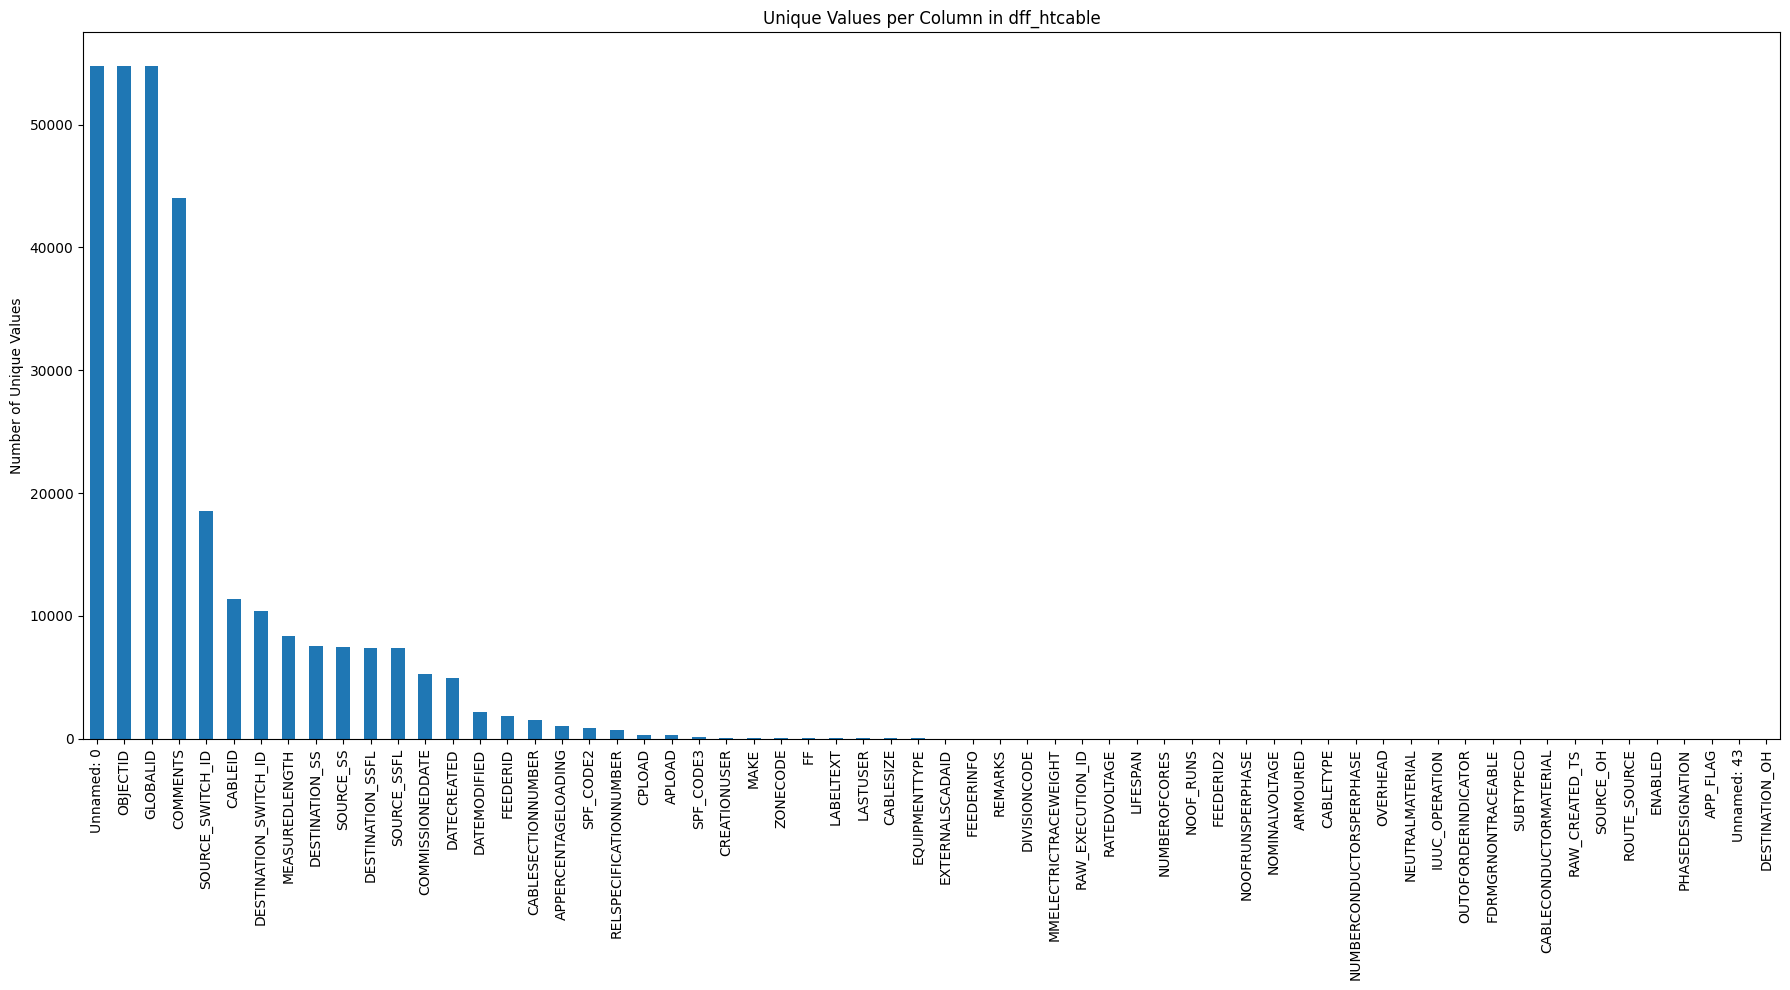

In [20]:
unique_counts = dff_htcable.nunique(dropna=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
unique_counts.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values per Column in dff_htcable')
plt.tight_layout()
plt.show()

 Visualizing Missing Values :


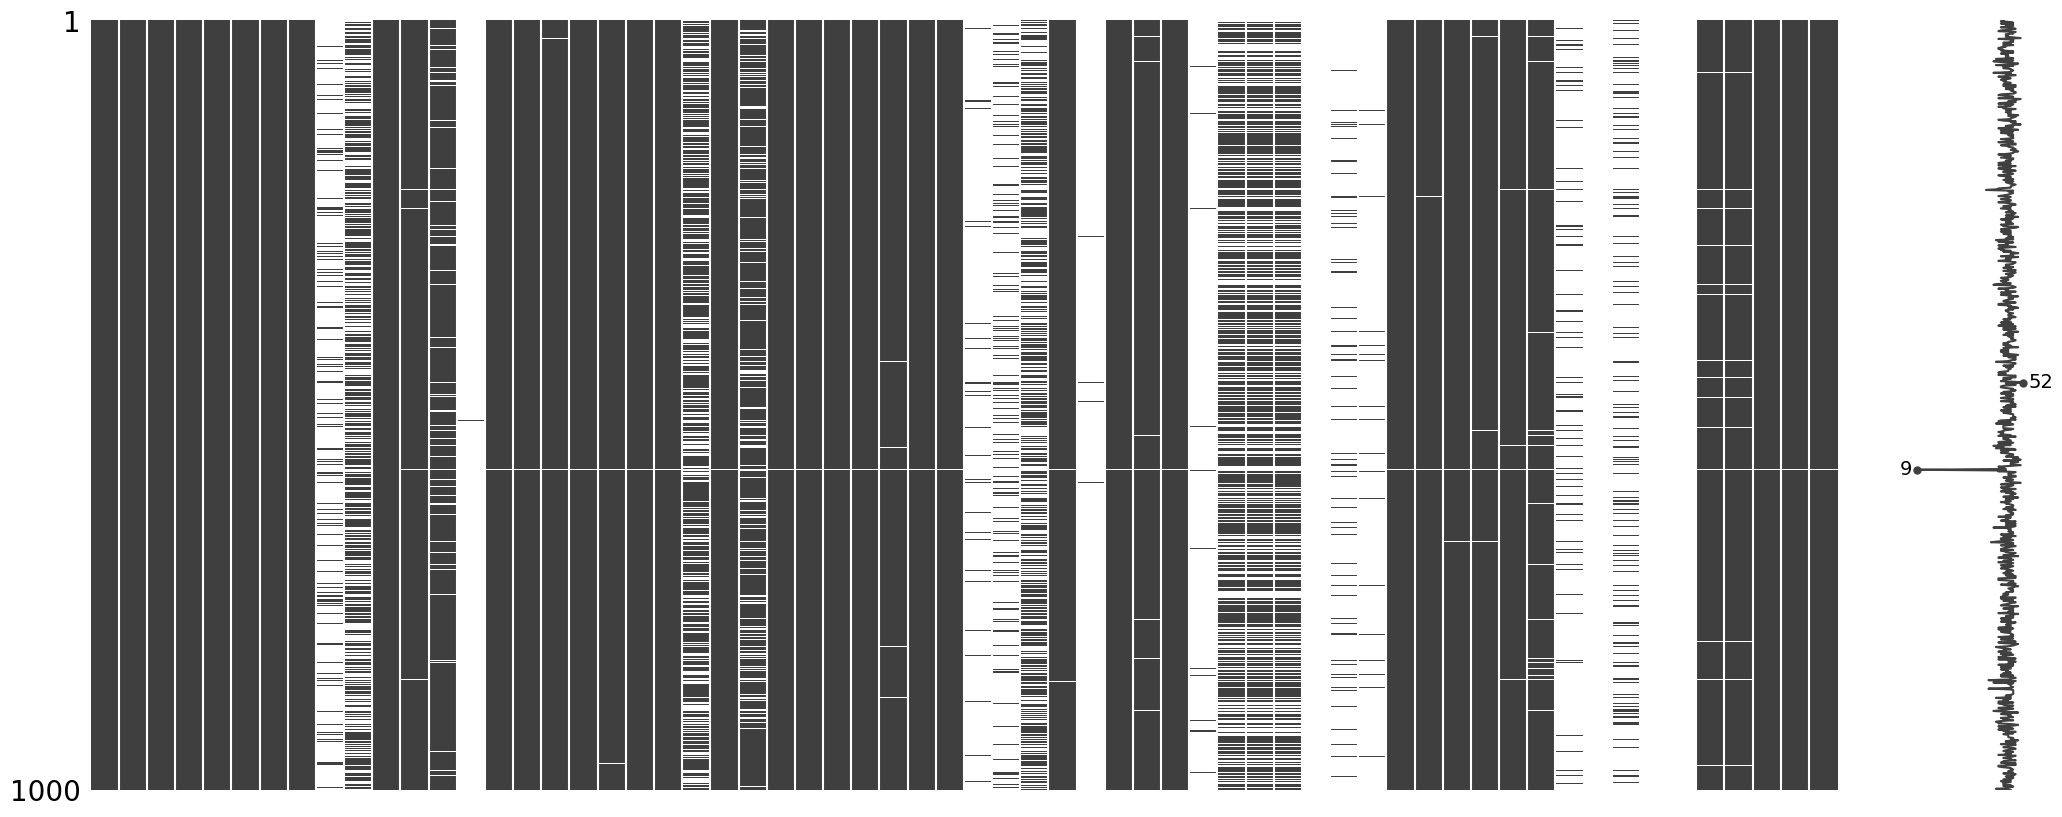

In [105]:
import missingno as msno

print(" Visualizing Missing Values :")
msno.matrix(dff_htcable.sample(min(len(dff_htcable), 1000)))
plt.show()



Bar Chart of Missing Values per Attribute:


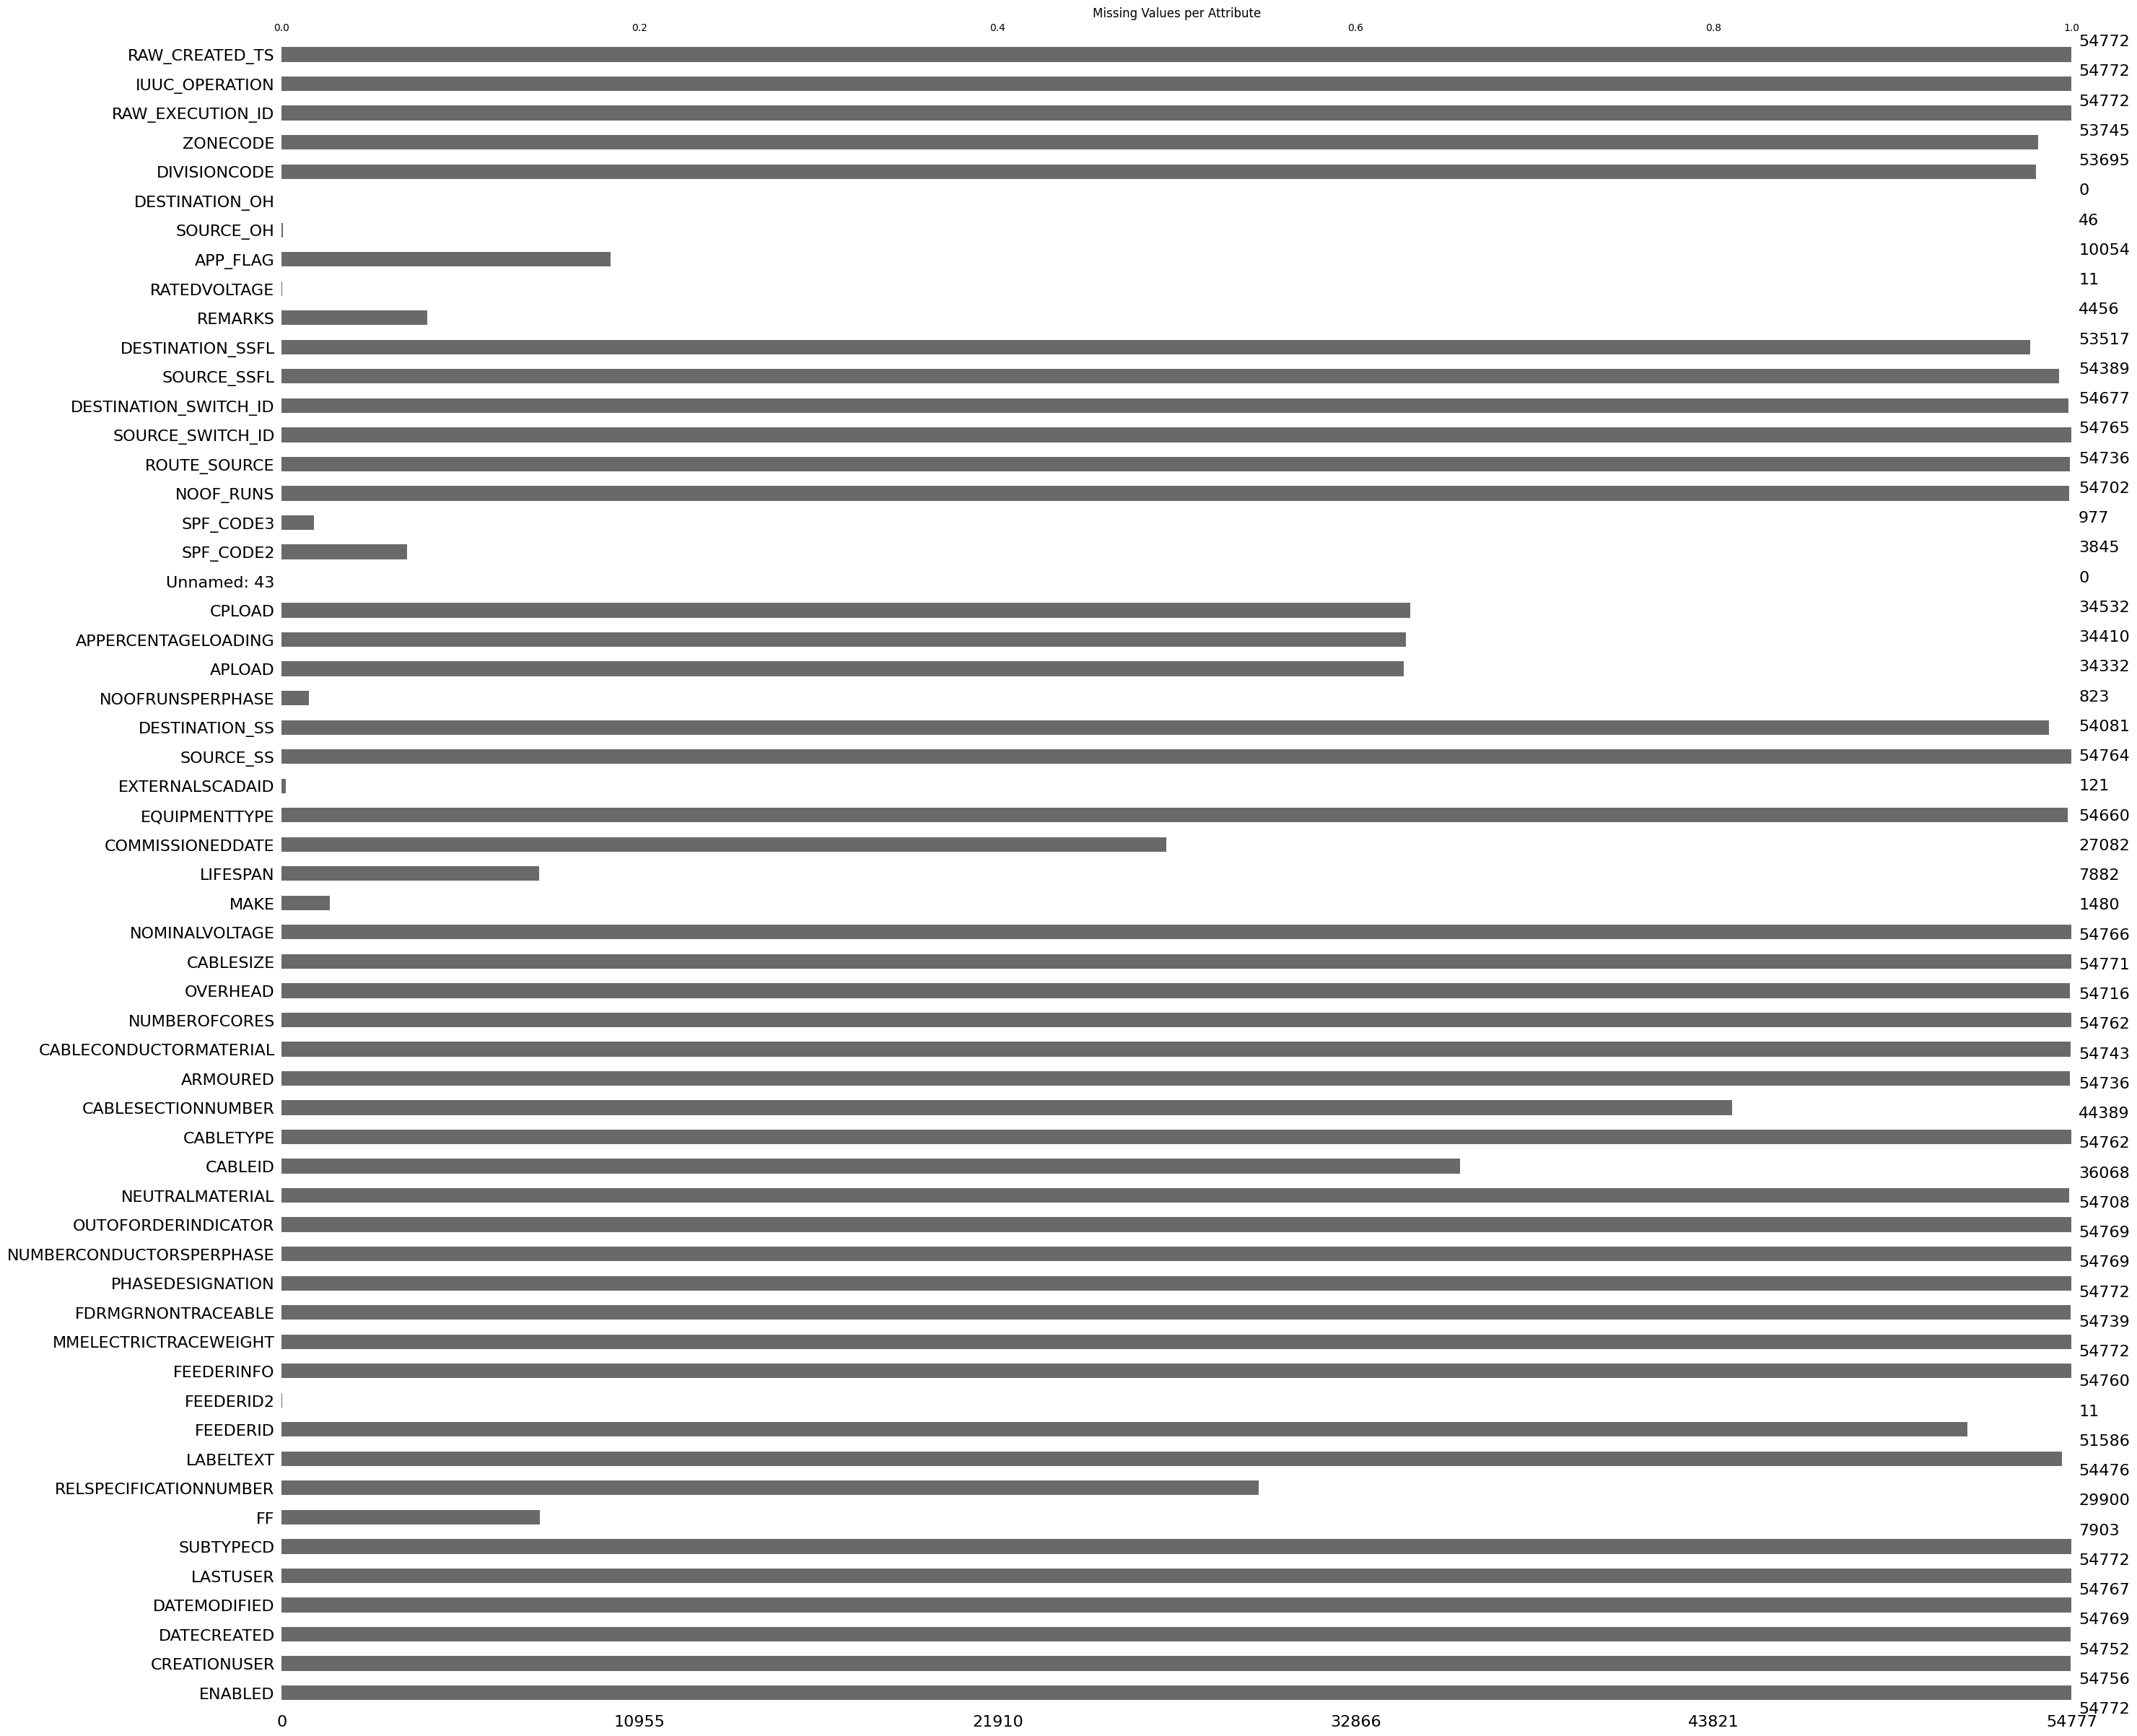

In [106]:

# Optionally, show a bar chart of missing values per column
print("Bar Chart of Missing Values per Attribute:")
msno.bar(dff_htcable_dropped, figsize=(32, 30))
plt.title("Missing Values per Attribute")
plt.show()

In [107]:
len(dff_htcable_dropped.columns)

57

In [108]:
col_feederid = dff_htcable_dropped['FEEDERID'].str.strip()

In [109]:
len(col_feederid.unique())

1822

In [110]:
len(dff_htcable['ZONECODE'].unique())

52

In [111]:
len(dff_htcable['DIVISIONCODE'].unique())

9

In [112]:
dff_htcable['DIVISIONCODE'].isna().sum()

np.int64(1082)

In [113]:
dff_htcable['DIVISIONCODE'].isnull().sum()

np.int64(1082)

In [114]:
dff_htcable['ZONECODE'].isna().sum()

np.int64(1032)

In [115]:
dff_htcable['LABELTEXT'].isna().sum()

np.int64(301)

In [116]:
len(dff_htcable['LABELTEXT'].unique())

36

In [117]:
SS = dff_htcable['SOURCE_SS'].unique()

In [118]:
len(SS)

7459

In [119]:
dd = dff_htcable['DESTINATION_SS'].unique()

In [120]:
len(dd)

7516

In [121]:
dd = pd.DataFrame(dd , columns=['DESTINATION_SS'] )

In [122]:
ss = pd.DataFrame(SS , columns=['SOURCE_SS'] )

In [123]:
concatenated_df = pd.concat([ss, dd], ignore_index=True)

In [143]:
concatenated_df.to_csv('/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/DATA_GENERATION/ss.csv', index=False)


In [148]:
new_df = pd.read_csv('/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/DATA_GENERATION/ss.csv')

In [151]:
new_df = new_df.drop_duplicates(subset=['SOURCE_SS'], keep='first')

In [153]:
new_df.to_csv('/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/DATA_GENERATION/ss_unique.csv', index=False)

In [154]:
sw = dff_htcable['SOURCE_SWITCH_ID'].unique()
sw = pd.DataFrame(sw)

In [155]:
dw = dff_htcable['DESTINATION_SWITCH_ID'].unique()
dw = pd.DataFrame(dw)

In [159]:
concad_sd = pd.concat([sw, dw], ignore_index=True)
concad_sd = concad_sd.drop_duplicates().reset_index(drop=True)

In [161]:
concad_sd.to_csv('/media/sagarkumar/New Volume/SAGAR/IPYNB_FILE/DATA_GENERATION/switch.csv', index=False)

In [1]:
import pandas as pd

In [2]:
df_feeder = pd.read_csv('/media/sagark24/New Volume/MERGE CDIS/2-Year-data/FEEDERDETAILS.csv')

/tmp/ipykernel_14322/4155839419.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_feeder = pd.read_csv('/media/sagark24/New Volume/MERGE CDIS/2-Year-data/FEEDERDETAILS.csv')


In [3]:
col_feederid = df_feeder['FEEDERID'].str.strip()

In [4]:
len(col_feederid.unique())

2254

In [5]:
df = col_feederid.to_frame(name='FEEDERID')

In [6]:
df.to_csv('/media/sagark24/New Volume/MERGE CDIS/IPYNB_FILE/DATA_GENERATION/FEEDERID.csv', index=False)